<a href="https://colab.research.google.com/github/SAIF2584/Linear-Regression/blob/main/Stockprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/nasdaq100.csv',sep = ';')

In [ ]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [ ]:
df = df.drop('Date',axis=1)

In [ ]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'nasdaq100 stock price')

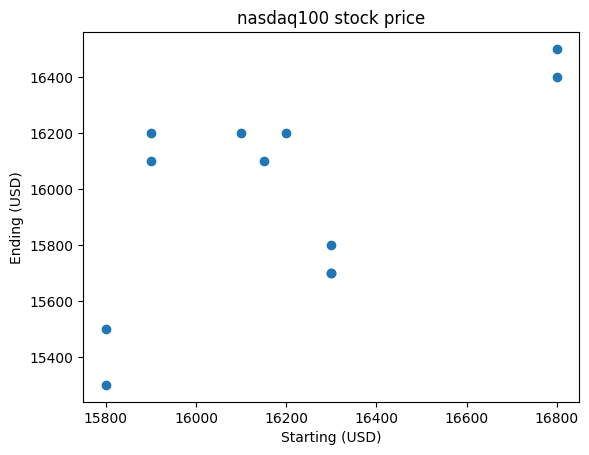

In [ ]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('nasdaq100 stock price')


In [ ]:
x= df.drop('Ending (USD)',axis = 1)
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [ ]:
y = df['Ending (USD)']
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [ ]:
x.mean()

,0
Starting (USD),16195.833333


In [ ]:
y.mean()

np.float64(15975.0)

Text(0.5, 1.0, 'nasdaq100 stock price')

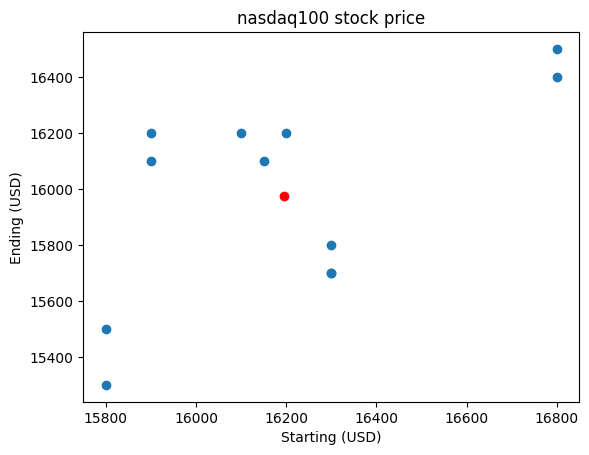

In [ ]:
plt.scatter(x.mean(),y.mean(),color = 'red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('nasdaq100 stock price')

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
#rules
m= reg.coef_
m

array([0.65258293])

In [ ]:

#rules
c= reg.intercept_
c

np.float64(5405.875557022609)

In [ ]:
#y= m*x + c

In [ ]:
m*15000 + c

array([15194.61957419])

In [ ]:
df['predicted_y'] =reg.predict(x)
df.head(10)

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'nasdaq100 stock price')

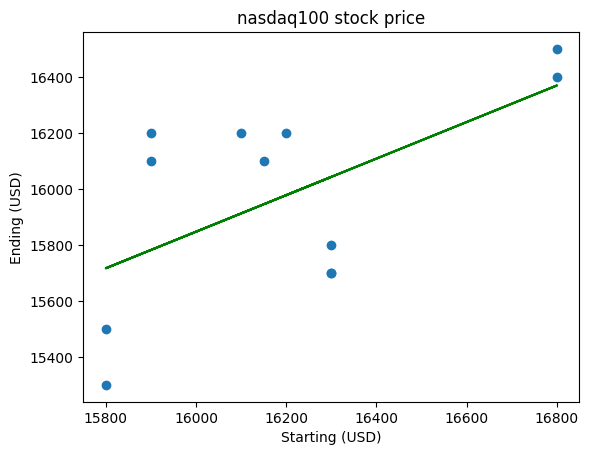

In [ ]:
plt.plot(x,df['predicted_y'],color = 'green')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('nasdaq100 stock price')

In [ ]:
reg.predict([[15900]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15781.94421522])

In [ ]:
#loss and cost function

In [ ]:
df ['loss'] = df['Ending (USD)'] - df['predicted_y']

In [ ]:
df.head()

,Starting (USD),Ending (USD),predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [ ]:
from  sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(df['predicted_y'],df['Ending (USD)'])
mse

80411.23397700385

In [ ]:
mae = mean_absolute_error(df['predicted_y'],df['Ending (USD)'])
mae

260.3840017604666

In [ ]:
abs(df['loss'])
sum(abs(df['loss']))

3124.6080211255994

In [ ]:
reg.score(x,y)

0.3577804940272571

In [ ]:
#R2 Squared Value / Accuracy for Regression

from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571